In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
toyota_data = pd.read_csv("ToyotaCorolla.csv", encoding= 'unicode_escape')
toyota_data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

# # EDA

In [ ]:
toyota_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
toyota_temp = pd.concat([toyota_data.iloc[:,2:4], toyota_data.iloc[:,6],toyota_data.iloc[:,8], toyota_data.iloc[:,12:14],toyota_data.iloc[:,15:18]], axis=1)
toyota_temp

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [ ]:
toyota1 = toyota_temp.rename({'Age_08_04':'Age', 'cc':'Cylinder_vol', 'Quarterly_Tax': 'Q_tax'}, axis=1)
toyota1

Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0     13500   23  46986   90          2000      3      5    210    1165
1     13750   23  72937   90          2000      3      5    210    1165
2     13950   24  41711   90          2000      3      5    210    1165
3     14950   26  48000   90          2000      3      5    210    1165
4     13750   30  38500   90          2000      3      5    210    1170
...     ...  ...    ...  ...           ...    ...    ...    ...     ...
1431   7500   69  20544   86          1300      3      5     69    1025
1432  10845   72  19000   86          1300      3      5     69    1015
1433   8500   71  17016   86          1300      3      5     69    1015
1434   7250   70  16916   86          1300      3      5     69    1015
1435   6950   76      1  110          1600      5      5     19    1114

[1436 rows x 9 columns]

In [ ]:
toyota1[toyota1.duplicated()]

Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
113  24950    8  13253  116          2000      5      5    234    1320

In [ ]:
#check for missing values
toyota1.isna().sum()

Price           0
Age             0
KM              0
HP              0
Cylinder_vol    0
Doors           0
Gears           0
Q_tax           0
Weight          0
dtype: int64

In [ ]:
toyota1[toyota1.duplicated()]

Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
113  24950    8  13253  116          2000      5      5    234    1320

In [ ]:
toyota1.shape


(1436, 9)

In [ ]:
toyota2= toyota1
toyota2 = toyota2.drop_duplicates().reset_index()

In [ ]:
toyota2


index  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0         0  13500   23  46986   90          2000      3      5    210    1165
1         1  13750   23  72937   90          2000      3      5    210    1165
2         2  13950   24  41711   90          2000      3      5    210    1165
3         3  14950   26  48000   90          2000      3      5    210    1165
4         4  13750   30  38500   90          2000      3      5    210    1170
...     ...    ...  ...    ...  ...           ...    ...    ...    ...     ...
1430   1431   7500   69  20544   86          1300      3      5     69    1025
1431   1432  10845   72  19000   86          1300      3      5     69    1015
1432   1433   8500   71  17016   86          1300      3      5     69    1015
1433   1434   7250   70  16916   86          1300      3      5     69    1015
1434   1435   6950   76      1  110          1600      5      5     19    1114

[1435 rows x 10 columns]

In [ ]:
toyota2= toyota2.drop(['index'], axis=1)
toyota2

Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0     13500   23  46986   90          2000      3      5    210    1165
1     13750   23  72937   90          2000      3      5    210    1165
2     13950   24  41711   90          2000      3      5    210    1165
3     14950   26  48000   90          2000      3      5    210    1165
4     13750   30  38500   90          2000      3      5    210    1170
...     ...  ...    ...  ...           ...    ...    ...    ...     ...
1430   7500   69  20544   86          1300      3      5     69    1025
1431  10845   72  19000   86          1300      3      5     69    1015
1432   8500   71  17016   86          1300      3      5     69    1015
1433   7250   70  16916   86          1300      3      5     69    1015
1434   6950   76      1  110          1600      5      5     19    1114

[1435 rows x 9 columns]

In [ ]:
toyota2.describe()


index         Price          Age             KM           HP  \
count  1435.000000   1435.000000  1435.000000    1435.000000  1435.000000   
mean    717.921254  10720.915679    55.980488   68571.782578   101.491986   
std     414.518894   3608.732978    18.563312   37491.094553    14.981408   
min       0.000000   4350.000000     1.000000       1.000000    69.000000   
25%     359.500000   8450.000000    44.000000   43000.000000    90.000000   
50%     718.000000   9900.000000    61.000000   63451.000000   110.000000   
75%    1076.500000  11950.000000    70.000000   87041.500000   110.000000   
max    1435.000000  32500.000000    80.000000  243000.000000   192.000000   

       Cylinder_vol        Doors        Gears        Q_tax       Weight  
count   1435.000000  1435.000000  1435.000000  1435.000000  1435.000000  
mean    1576.560976     4.032753     5.026481    87.020209  1072.287108  
std      424.387533     0.952667     0.188575    40.959588    52.251882  
min     1300.000000     2.000000     3.000000    19.000000  1000.000000  
25%     1400.000000     3.000000     5.000000    69.000000  1040.000000  
50%     1600.000000     4.000000     5.000000    85.000000  1070.000000  
75%     1600.000000     5.000000     5.000000    85.000000  1085.000000  
max    16000.000000     5.000000     6.000000   283.000000  1615.000000

# Correlation Matrix

In [ ]:
toyota2.corr()

Price       Age        KM        HP  Cylinder_vol     Doors  \
Price         1.000000 -0.876273 -0.569420  0.314134      0.124375  0.183604   
Age          -0.876273  1.000000  0.504575 -0.155293     -0.096549 -0.146929   
KM           -0.569420  0.504575  1.000000 -0.332904      0.103822 -0.035193   
HP            0.314134 -0.155293 -0.332904  1.000000      0.035207  0.091803   
Cylinder_vol  0.124375 -0.096549  0.103822  0.035207      1.000000  0.079254   
Doors         0.183604 -0.146929 -0.035193  0.091803      0.079254  1.000000   
Gears         0.063831 -0.005629  0.014890  0.209642      0.014732 -0.160101   
Q_tax         0.211508 -0.193319  0.283312 -0.302287      0.305982  0.107353   
Weight        0.575869 -0.466484 -0.023969  0.087143      0.335077  0.301734   

                 Gears     Q_tax    Weight  
Price         0.063831  0.211508  0.575869  
Age          -0.005629 -0.193319 -0.466484  
KM            0.014890  0.283312 -0.023969  
HP            0.209642 -0.302287  0.087143  
Cylinder_vol  0.014732  0.305982  0.335077  
Doors        -0.160101  0.107353  0.301734  
Gears         1.000000 -0.005125  0.021238  
Q_tax        -0.005125  1.000000  0.621988  
Weight        0.021238  0.621988  1.000000

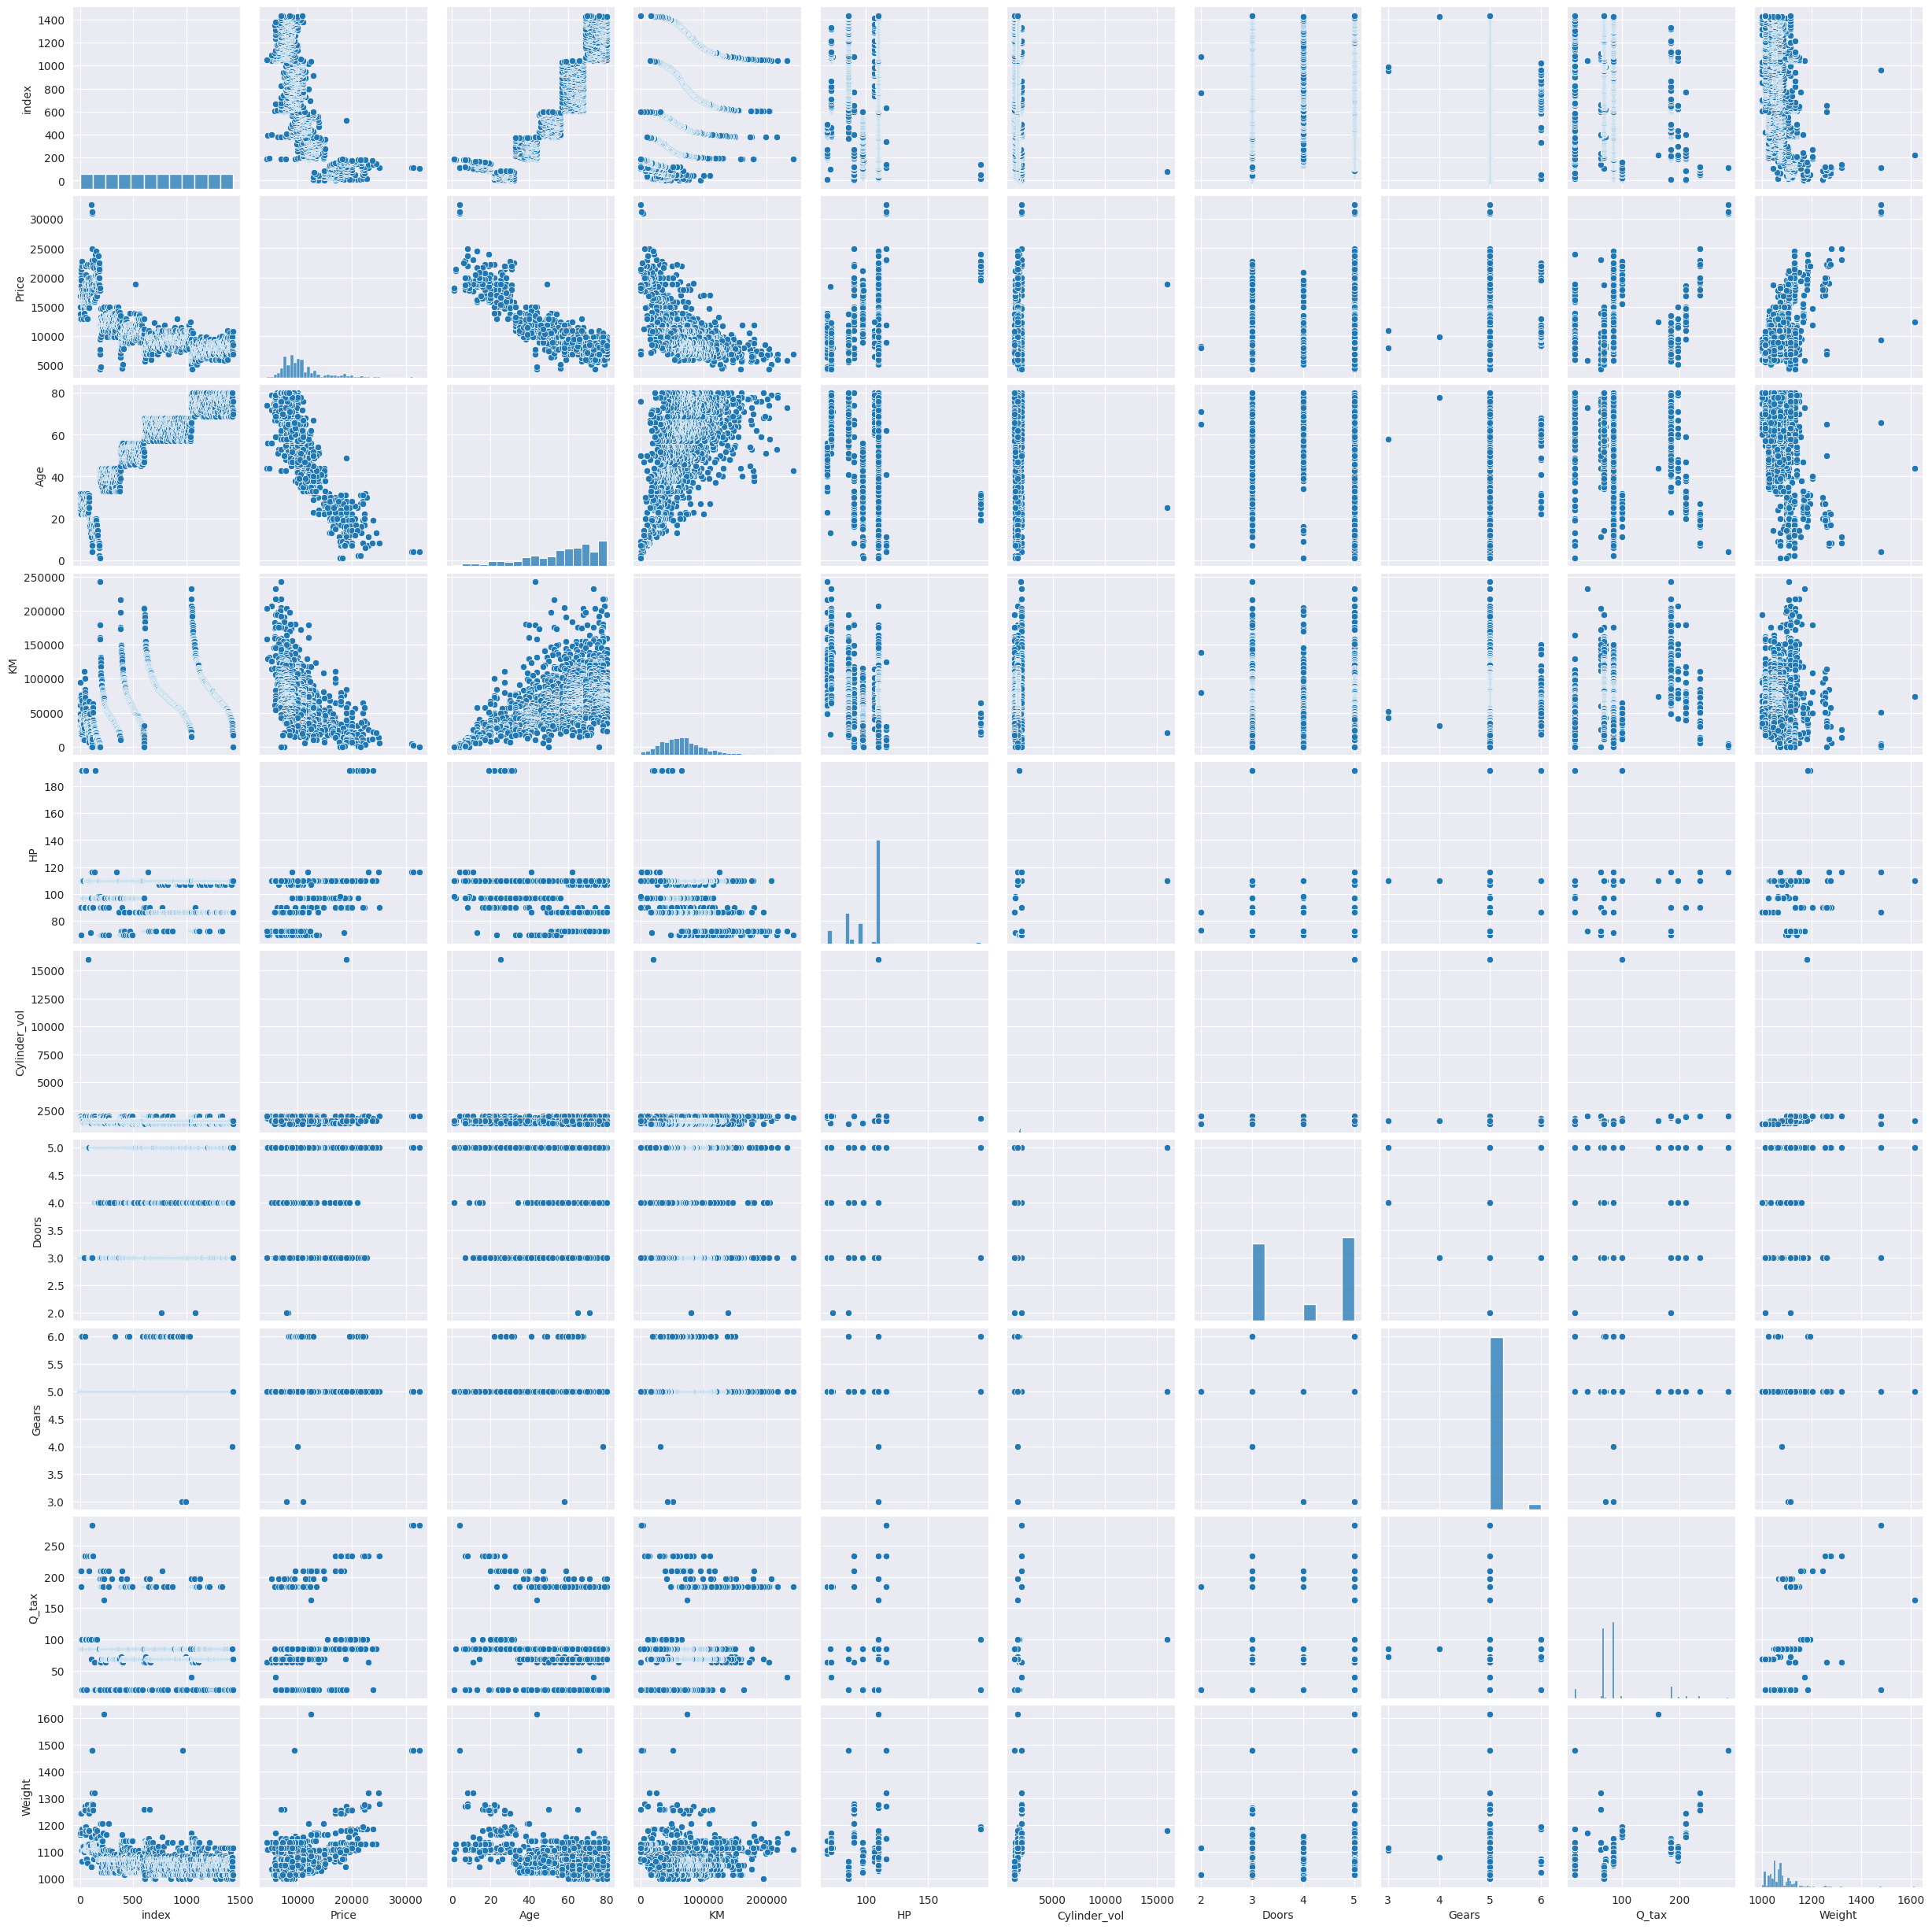

In [ ]:
sns.pairplot(toyota2)

# Standardizing data

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
toyota2_scale = scale.fit_transform(toyota2)

In [ ]:
toyota2_scale


array([[-1.73254233,  0.77036821, -1.77726827, ..., -0.14047507,
         3.00351318,  1.77496405],
       [-1.73012906,  0.83966875, -1.77726827, ..., -0.14047507,
         3.00351318,  1.77496405],
       [-1.72771578,  0.89510918, -1.72337979, ..., -0.14047507,
         3.00351318,  1.77496405],
       ...,
       [ 1.72568257, -0.61564265,  0.80937864, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [ 1.72809585, -0.96214536,  0.75549016, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [ 1.73050913, -1.04530601,  1.07882103, ..., -0.14047507,
        -1.66124526,  0.7985824 ]])

In [ ]:
toyota2_df = pd.DataFrame(toyota2_scale)
toyota2_df.head()

0         1         2         3         4         5         6  \
0 -1.732542  0.770368 -1.777268 -0.575958 -0.767351  0.998113 -1.084443   
1 -1.730129  0.839669 -1.777268  0.116474 -0.767351  0.998113 -1.084443   
2 -1.727716  0.895109 -1.723380 -0.716707 -0.767351  0.998113 -1.084443   
3 -1.725303  1.172311 -1.615603 -0.548902 -0.767351  0.998113 -1.084443   
4 -1.722889  0.839669 -1.400049 -0.802384 -0.767351  0.998113 -1.084443   

          7         8         9  
0 -0.140475  3.003513  1.774964  
1 -0.140475  3.003513  1.774964  
2 -0.140475  3.003513  1.774964  
3 -0.140475  3.003513  1.774964  
4 -0.140475  3.003513  1.870688

In [ ]:
# Adding column names to data frame
toyota2_df.columns=['Price',	'Age',	'KM',	'HP',	'Cylinder_vol',	'Doors',	'Gears',	'Q_tax',	'Weight']
toyota2_df.head()

ValueError: ignored

# Preparing a model


In [ ]:
model = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit()


In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:42:17   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age           -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM              -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP              31.5846      2.818     11.210      0.000      26.058      37.112
Cylinder_vol    -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors           -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears          597.7159    196.969      3.035      0.002     211.335     984.097
Q_tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight          16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)


(0.8625200256947001, 0.8617487495415147)

In [ ]:
#Coefficients
model.params

Intercept      -5472.540368
Age             -121.713891
KM                -0.020737
HP                31.584612
Cylinder_vol      -0.118558
Doors             -0.920189
Gears            597.715894
Q_tax              3.858805
Weight            16.855470
dtype: float64

In [ ]:
#Cylinder_vol & Doors are insignificant as per pvalues

# Simple Linear Regression Models

In [ ]:
ml_C_vol=smf.ols('Price ~ Cylinder_vol',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)

Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


In [ ]:
#Cylinder_vol is significant when taken independently



In [ ]:
ml_C_vol.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           2.29e-06
Time:                        17:44:03   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9053.5368    363.894     24.880      0.000    8339.715    9767.359
Cylinder_vol     1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
ml_D=smf.ols('Price ~ Doors',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)

Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


In [ ]:
ml_D.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           2.40e-12
Time:                        17:44:39   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Doors is also significant when taken independently



# Building model using Cylinder_vol and Doors as independent variable

In [ ]:
ml_C_D=smf.ols('Price~Cylinder_vol+Doors',data = toyota2).fit()
print(ml_C_D.tvalues, '\n', ml_C_D.pvalues)

Intercept       12.786341
Cylinder_vol     4.268006
Doors            6.752236
dtype: float64 
 Intercept       1.580945e-35
Cylinder_vol    2.101878e-05
Doors           2.109558e-11
dtype: float64


In [ ]:
#Cylinder_vol & Doors are significant when taken collectively



# Model Validation

# Calculating VIF values to check collinearty


In [ ]:
rsq_Age = smf.ols('Age ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM ~ Age+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP ~ KM+Age+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CV = smf.ols('Cylinder_vol ~ KM+HP+Age+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_CV = 1/(1-rsq_CV)

rsq_D = smf.ols('Doors ~ KM+HP+Cylinder_vol+Age+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_D = 1/(1-rsq_D)

rsq_G = smf.ols('Gears ~ KM+HP+Cylinder_vol+Doors+Age+Q_tax+Weight',data=toyota2).fit().rsquared
vif_G = 1/(1-rsq_G)

rsq_QT = smf.ols('Q_tax ~ KM+HP+Cylinder_vol+Doors+Gears+Age+Weight',data=toyota2).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_W = smf.ols('Weight ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Age',data=toyota2).fit().rsquared
vif_W = 1/(1-rsq_W)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Cylinder_vol', 'Doors', 'Gears', 'Q_tax', 'Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CV, vif_D, vif_G, vif_QT,vif_W]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

Variables       VIF
0           Age  1.876236
1            KM  1.757178
2            HP  1.419180
3  Cylinder_vol  1.163470
4         Doors  1.155890
5         Gears  1.098843
6         Q_tax  2.295375
7        Weight  2.487180

In [ ]:
# All the variables have vif < 20, therfore no multicolinearty in variables.
# so we will consider all the variables in model building

# Residual Analysis


# Test for Normality of Residuals (Q-Q Plot)

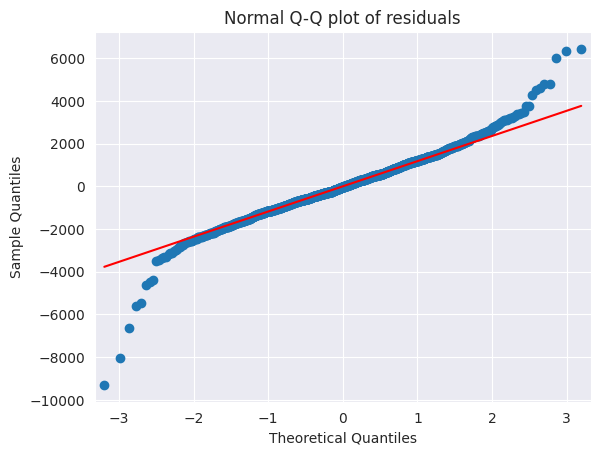

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [ ]:
list(np.where(model.resid>6000))


[array([109, 146, 522])]

In [ ]:
list(np.where(model.resid < -6000))

[array([220, 600, 959])]

# Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # z = (x-mu)/sigma

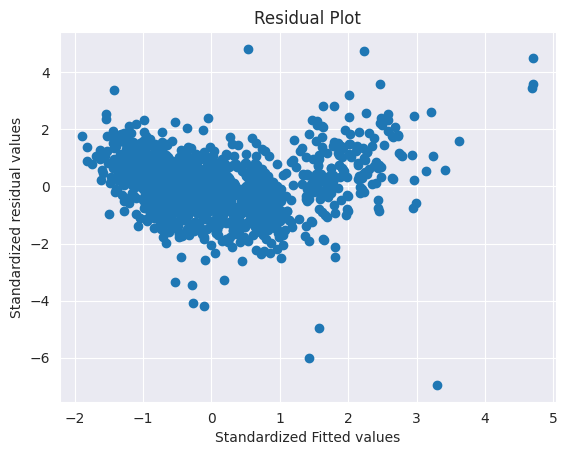

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Test for Errors (Residual Vs Regressors)

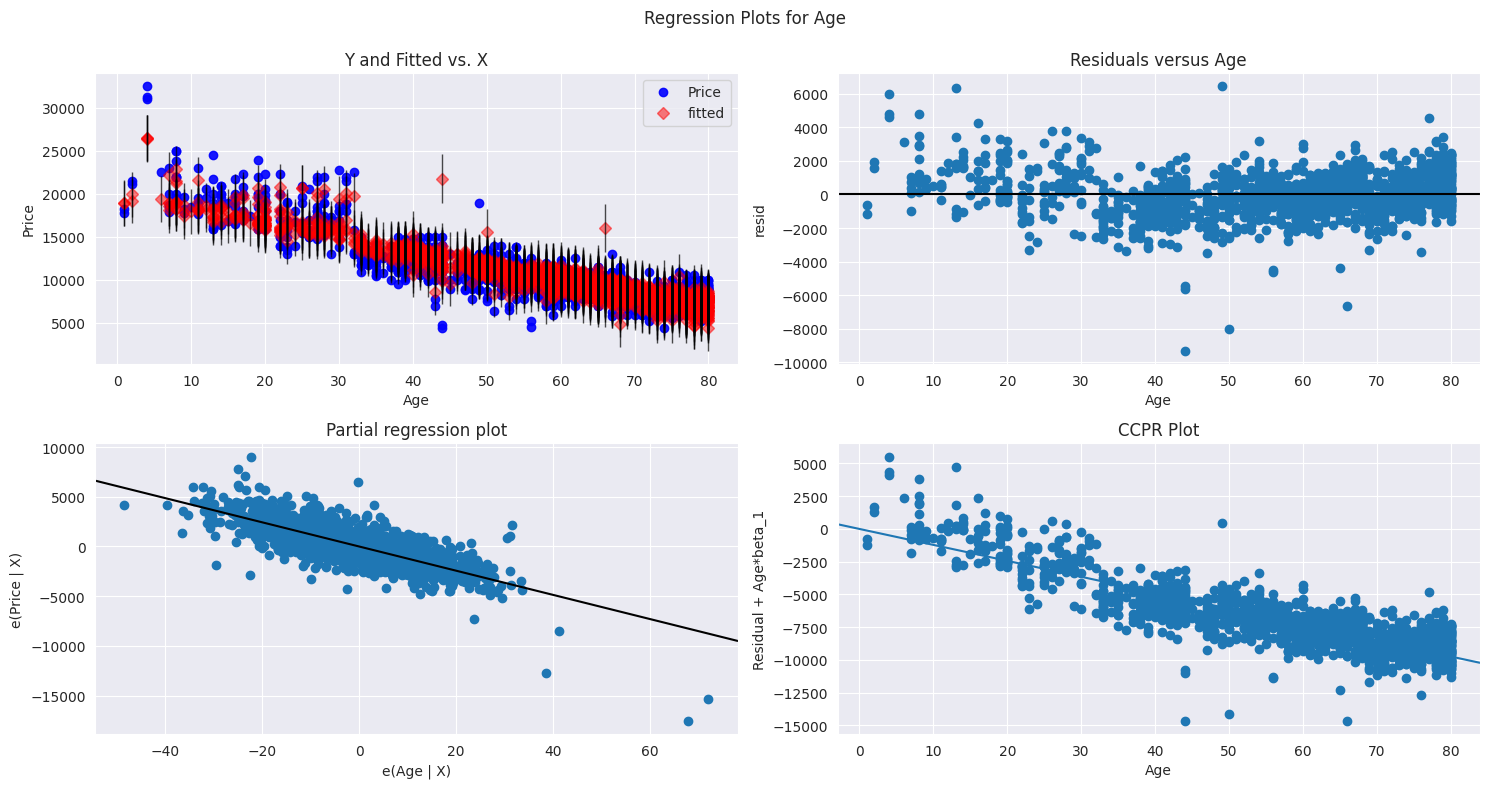

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

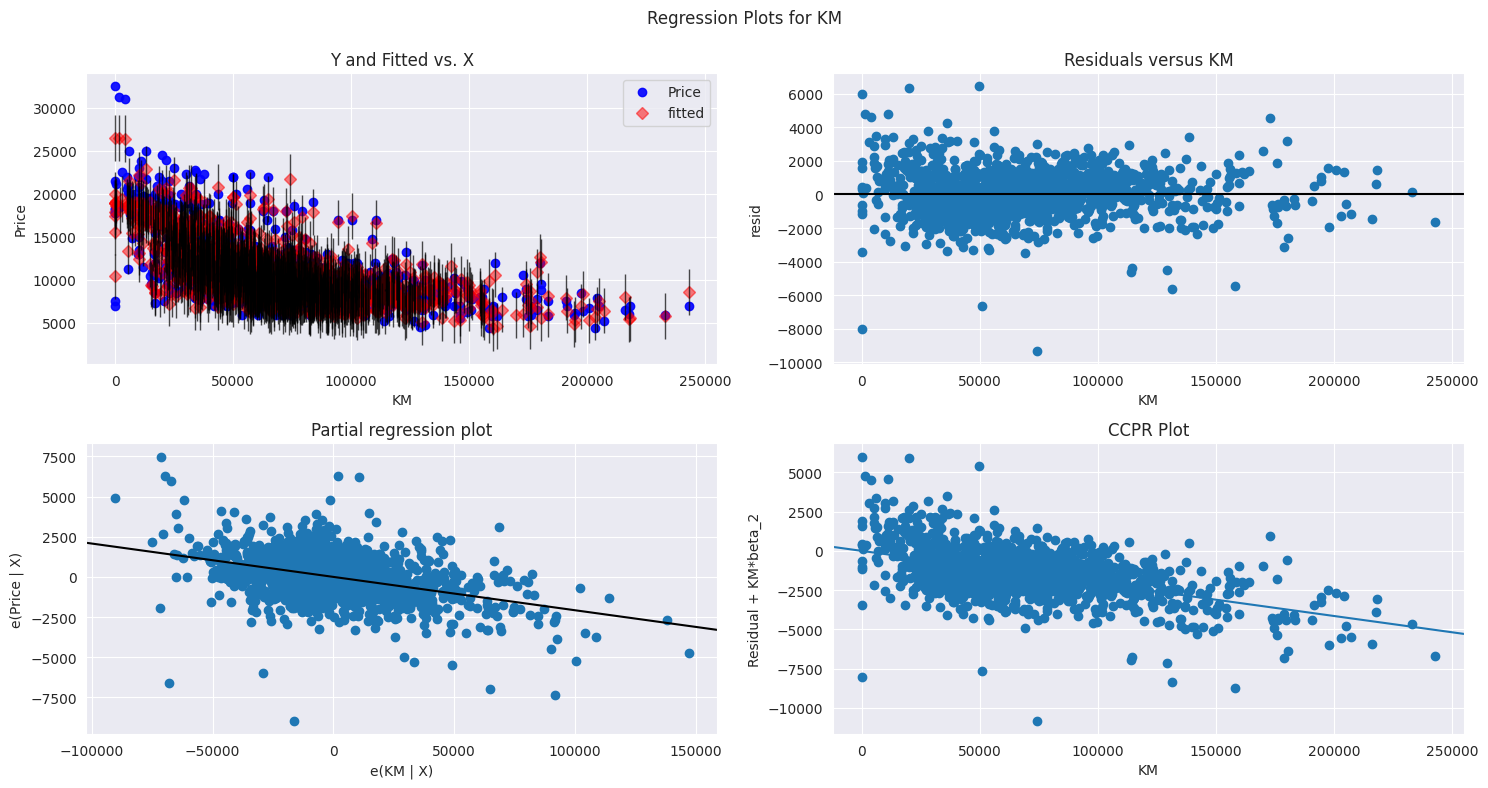

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

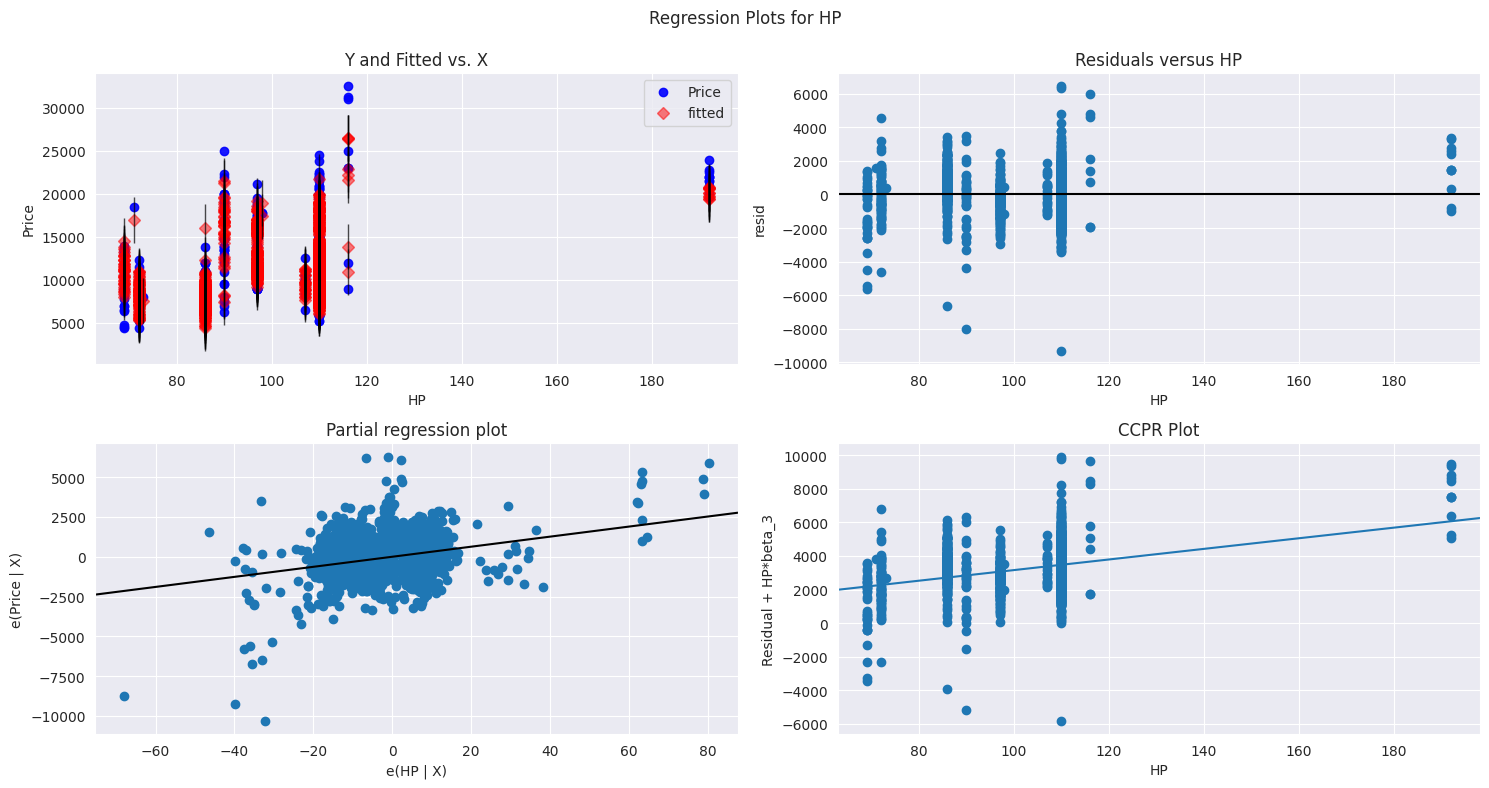

In [ ]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Cylinder_vol", fig=fig)
plt.show()

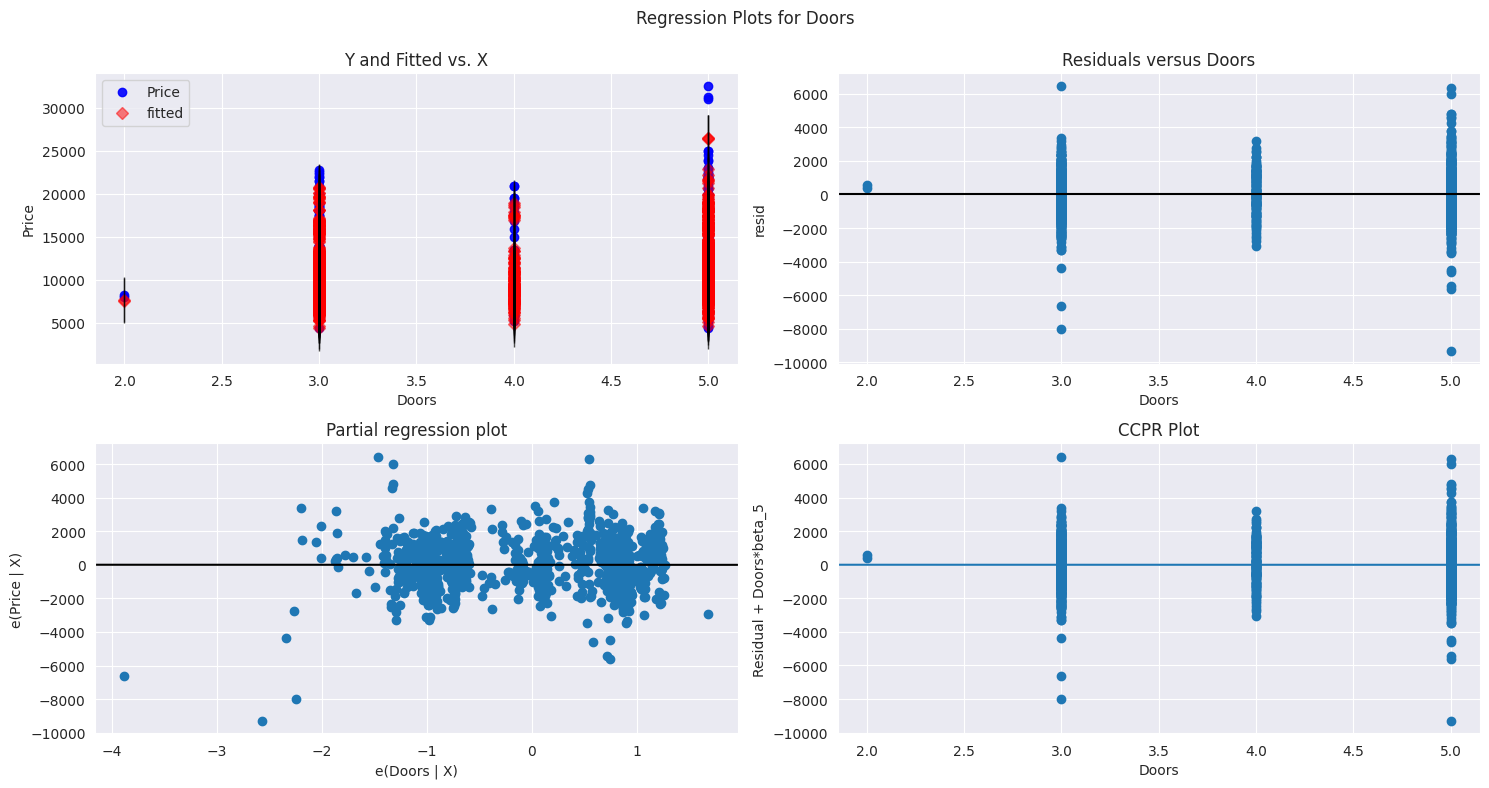

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

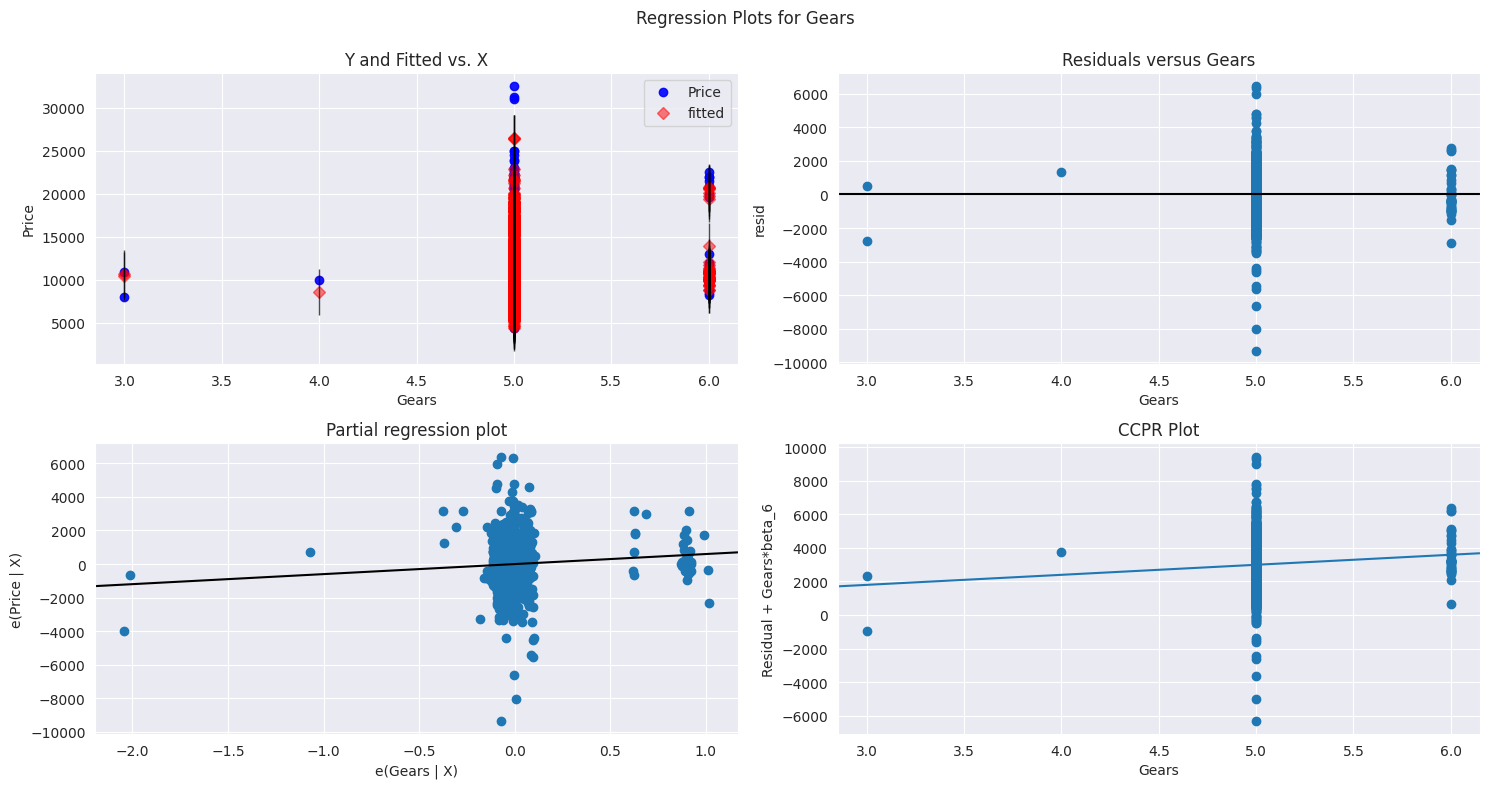

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Q_tax", fig=fig)
plt.show()

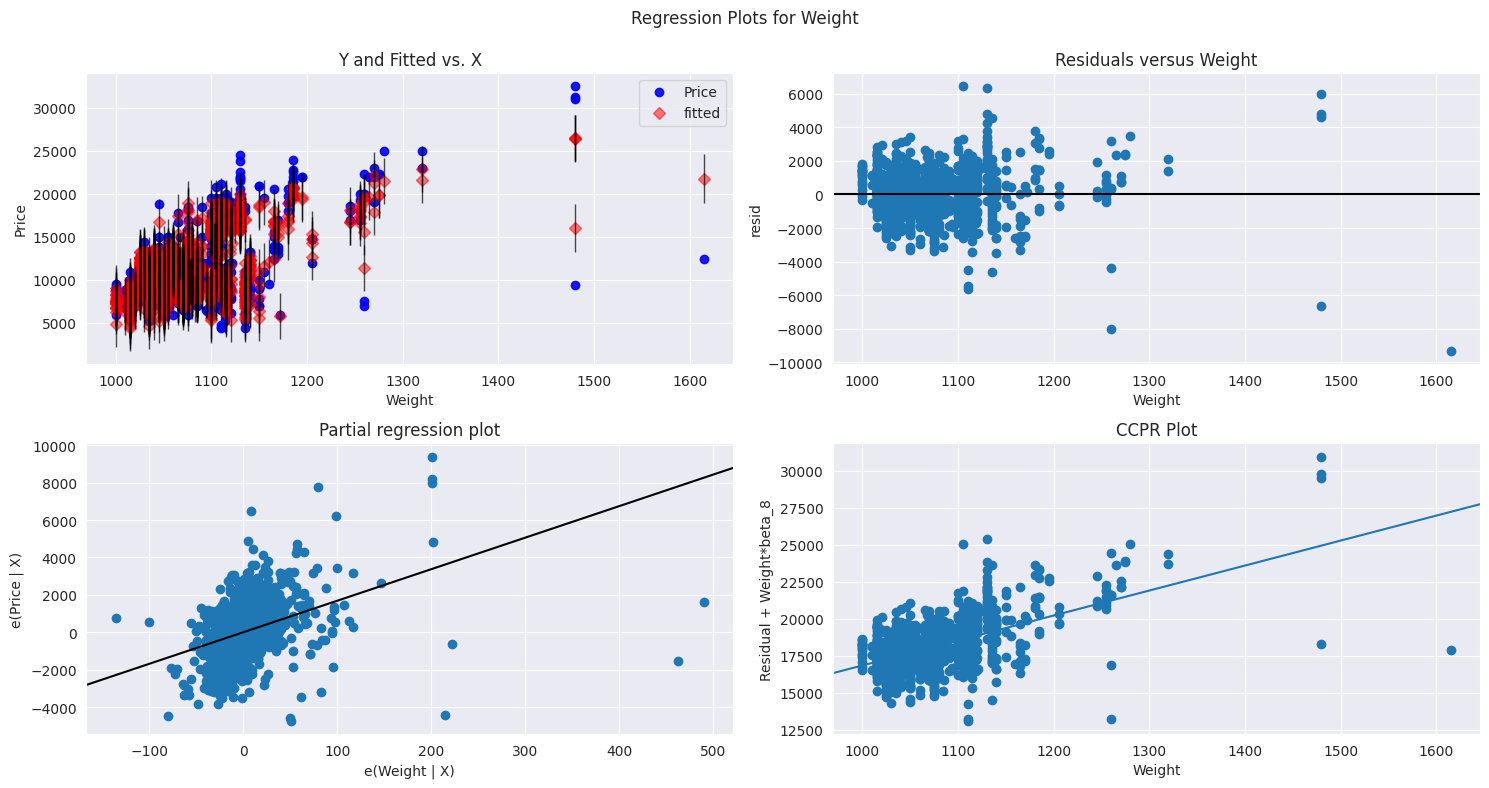

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers


# Cook’s Distance


In [ ]:
model_influence = model.get_influence() # get_influence() drived from our model i.e "model"
(c, _) = model_influence.cooks_distance

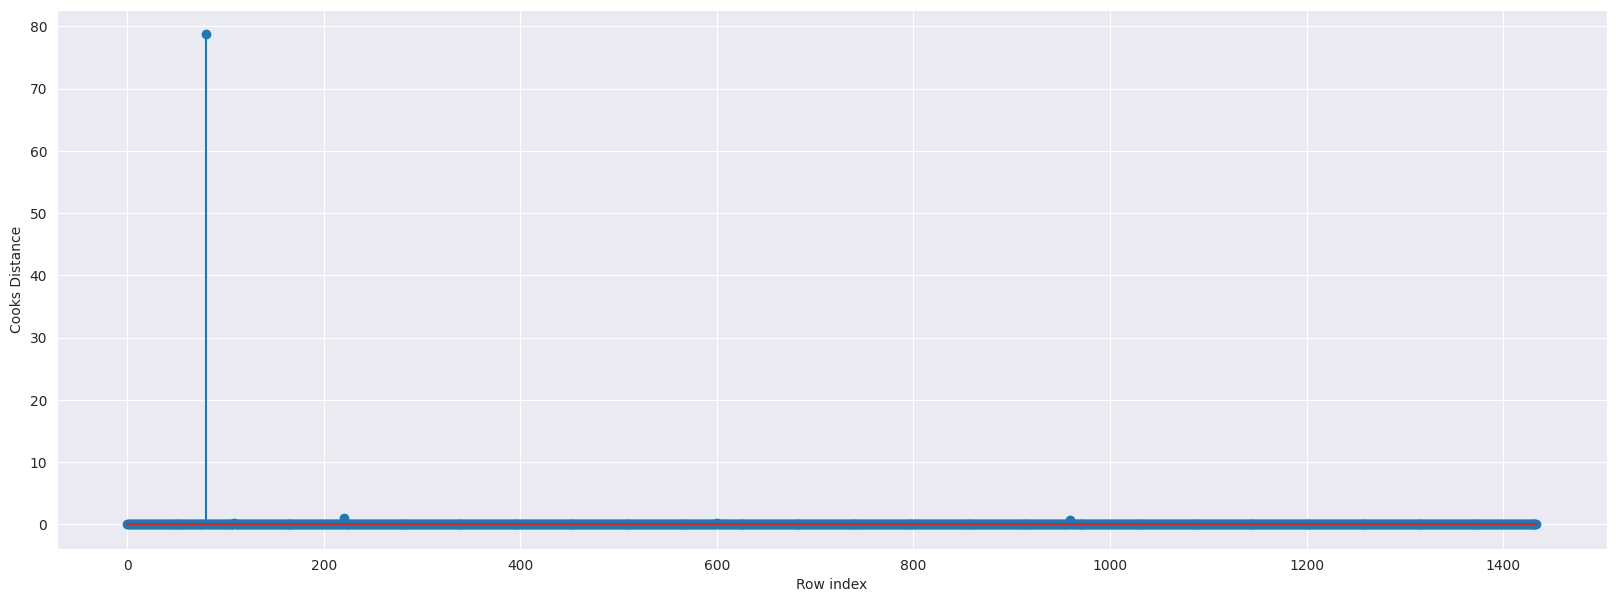

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(80, 78.72950582258932)

# High Influence points ( Leverage value)

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax = plt.subplots(figsize=(15, 15))
influence_plot(model, ax= ax)
plt.show()

In [ ]:
k = toyota2.shape[1] # K is no. of columns

n = toyota2.shape[0] # n is no. of rows
print(k, n)

leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

10 1435
0.022996515679442508


In [ ]:
##### From the above plot, it is evident that data point 80 is the influencer

In [ ]:
toyota2[toyota2.index.isin([80])]

index  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
80     80  18950   25  20019  110         16000      5      5    100    1180

In [ ]:
#See the differences in HP, Doors and other variable values
toyota2.head(15)

index  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0       0  13500   23  46986   90          2000      3      5    210    1165
1       1  13750   23  72937   90          2000      3      5    210    1165
2       2  13950   24  41711   90          2000      3      5    210    1165
3       3  14950   26  48000   90          2000      3      5    210    1165
4       4  13750   30  38500   90          2000      3      5    210    1170
5       5  12950   32  61000   90          2000      3      5    210    1170
6       6  16900   27  94612   90          2000      3      5    210    1245
7       7  18600   30  75889   90          2000      3      5    210    1245
8       8  21500   27  19700  192          1800      3      5    100    1185
9       9  12950   23  71138   69          1900      3      5    185    1105
10     10  20950   25  31461  192          1800      3      6    100    1185
11     11  19950   22  43610  192          1800      3      6    100    1185
12     12  19600   25  32189  192          1800      3      6    100    1185
13     13  21500   31  23000  192          1800      3      6    100    1185
14     14  22500   32  34131  192          1800      3      6    100    1185

# Improving the model

In [ ]:
#Load the data
toyota3 = toyota2

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota3=toyota3.drop(toyota3.index[[80]],axis=0).reset_index()

In [ ]:
toyota3

level_0  index  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  \
0           0      0  13500   23  46986   90          2000      3      5   
1           1      1  13750   23  72937   90          2000      3      5   
2           2      2  13950   24  41711   90          2000      3      5   
3           3      3  14950   26  48000   90          2000      3      5   
4           4      4  13750   30  38500   90          2000      3      5   
...       ...    ...    ...  ...    ...  ...           ...    ...    ...   
1429     1430   1431   7500   69  20544   86          1300      3      5   
1430     1431   1432  10845   72  19000   86          1300      3      5   
1431     1432   1433   8500   71  17016   86          1300      3      5   
1432     1433   1434   7250   70  16916   86          1300      3      5   
1433     1434   1435   6950   76      1  110          1600      5      5   

      Q_tax  Weight  
0       210    1165  
1       210    1165  
2       210    1165  
3       210    1165  
4       210    1170  
...     ...     ...  
1429     69    1025  
1430     69    1015  
1431     69    1015  
1432     69    1015  
1433     19    1114  

[1434 rows x 11 columns]

In [ ]:
#Drop the original index
toyota3=toyota3.drop(['index'],axis=1)

In [ ]:
toyota3.head()


level_0  Price  Age     KM  HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0        0  13500   23  46986  90          2000      3      5    210    1165
1        1  13750   23  72937  90          2000      3      5    210    1165
2        2  13950   24  41711  90          2000      3      5    210    1165
3        3  14950   26  48000  90          2000      3      5    210    1165
4        4  13750   30  38500  90          2000      3      5    210    1170

# Rebuild Model


In [ ]:
#Rebuild model and generate R-Squared and AIC values
#
model1 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota3).fit()

In [ ]:
(model1.rsquared,model1.aic)

(0.8681163912634055, 24669.363894157)

In [ ]:
#Comparing above R-Square and AIC values with original model, we can conclude that accuracy of model1 is high as compared to initial model named model

# Calculating Cook's Distance

In [ ]:
model1_influence = model1.get_influence() # get_influence() drived from our model i.e 'model1"
(c1, _) = model1_influence.cooks_distance  # Cook’s Distance

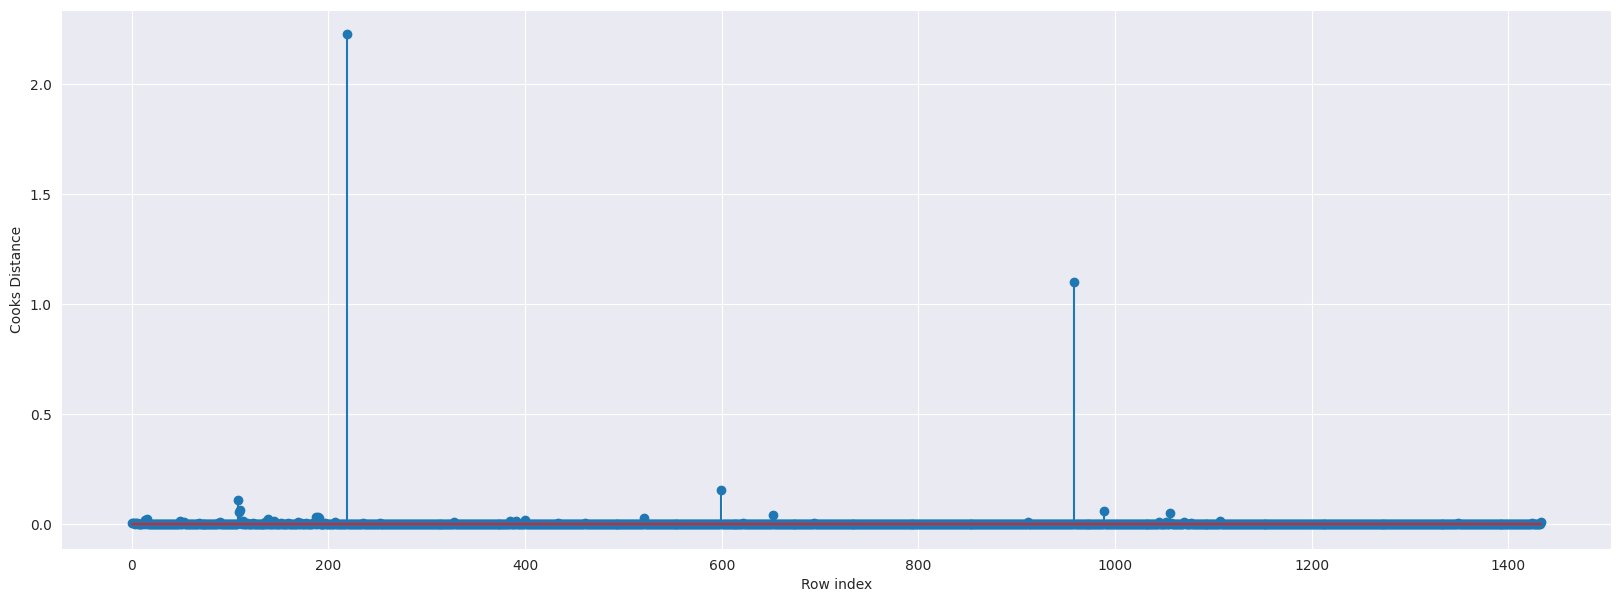

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than 1
(np.argmax(c1),np.max(c1))

(219, 2.225351365527102)

In [ ]:
toyota3[toyota3.index.isin([219])]

level_0  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  \
219      220  12450   44  74172  110          1600      5      5    163   

     Weight  
219    1615

In [ ]:
#Drop 219th observation
#219th observation is outlier having value more than 1
toyota4 = toyota3
toyota4=toyota4.drop(toyota4.index[[219]],axis=0)

In [ ]:
toyota4

level_0  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  \
0           0  13500   23  46986   90          2000      3      5    210   
1           1  13750   23  72937   90          2000      3      5    210   
2           2  13950   24  41711   90          2000      3      5    210   
3           3  14950   26  48000   90          2000      3      5    210   
4           4  13750   30  38500   90          2000      3      5    210   
...       ...    ...  ...    ...  ...           ...    ...    ...    ...   
1429     1430   7500   69  20544   86          1300      3      5     69   
1430     1431  10845   72  19000   86          1300      3      5     69   
1431     1432   8500   71  17016   86          1300      3      5     69   
1432     1433   7250   70  16916   86          1300      3      5     69   
1433     1434   6950   76      1  110          1600      5      5     19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1429    1025  
1430    1015  
1431    1015  
1432    1015  
1433    1114  

[1433 rows x 10 columns]

In [ ]:
#Reset the index and re arrange the row values
toyota4=toyota4.reset_index()

In [ ]:
toyota4


index  level_0  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  \
0         0        0  13500   23  46986   90          2000      3      5   
1         1        1  13750   23  72937   90          2000      3      5   
2         2        2  13950   24  41711   90          2000      3      5   
3         3        3  14950   26  48000   90          2000      3      5   
4         4        4  13750   30  38500   90          2000      3      5   
...     ...      ...    ...  ...    ...  ...           ...    ...    ...   
1428   1429     1430   7500   69  20544   86          1300      3      5   
1429   1430     1431  10845   72  19000   86          1300      3      5   
1430   1431     1432   8500   71  17016   86          1300      3      5   
1431   1432     1433   7250   70  16916   86          1300      3      5   
1432   1433     1434   6950   76      1  110          1600      5      5   

      Q_tax  Weight  
0       210    1165  
1       210    1165  
2       210    1165  
3       210    1165  
4       210    1170  
...     ...     ...  
1428     69    1025  
1429     69    1015  
1430     69    1015  
1431     69    1015  
1432     19    1114  

[1433 rows x 11 columns]

In [ ]:
# drop the original index
toyota4=toyota4.drop(['index'],axis=1)

In [ ]:
toyota4.head()


level_0  Price  Age     KM  HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0        0  13500   23  46986  90          2000      3      5    210    1165
1        1  13750   23  72937  90          2000      3      5    210    1165
2        2  13950   24  41711  90          2000      3      5    210    1165
3        3  14950   26  48000  90          2000      3      5    210    1165
4        4  13750   30  38500  90          2000      3      5    210    1170

# Rebuild Model

In [ ]:
#Build the model on the new data
model2 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota4).fit()
(model2.rsquared,model2.aic)

(0.8765926307402282, 24557.748263908954)

In [ ]:
#Again check for influencers (Cook's Distance)
(c2, _) = model2.get_influence().cooks_distance

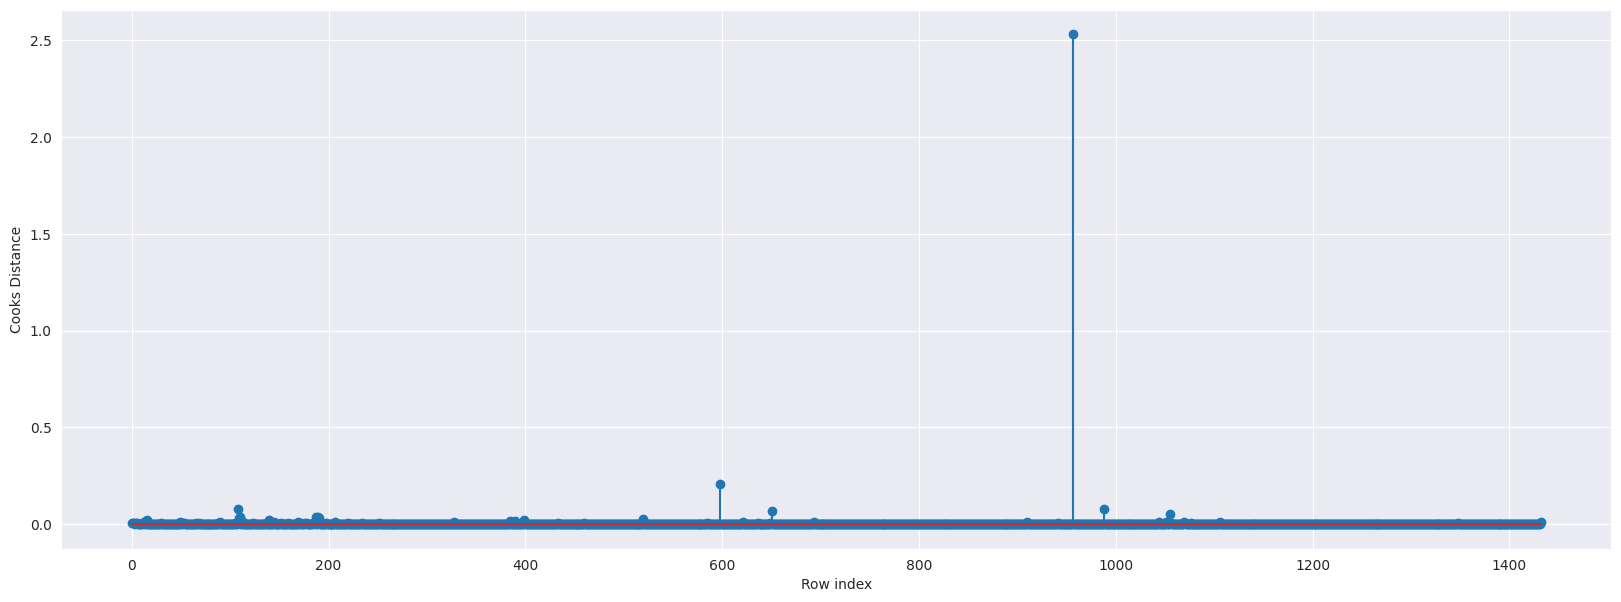

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than 1
(np.argmax(c2),np.max(c2))

(957, 2.53077962327821)

In [ ]:
toyota4[toyota4.index.isin([957])]

level_0  Price  Age     KM  HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
957      959   9390   66  50806  86          1300      3      5     19    1480

In [ ]:
# Visualize the difference between 957th record and rest other records
toyota4.head()

level_0  Price  Age     KM  HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0        0  13500   23  46986  90          2000      3      5    210    1165
1        1  13750   23  72937  90          2000      3      5    210    1165
2        2  13950   24  41711  90          2000      3      5    210    1165
3        3  14950   26  48000  90          2000      3      5    210    1165
4        4  13750   30  38500  90          2000      3      5    210    1170

In [ ]:
#Drop 957th observation
#957th observation is outlier having cook's distance more than 1
toyota5 = toyota4
toyota5=toyota5.drop(toyota5.index[[957]],axis=0)

In [ ]:
toyota5


level_0  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  \
0           0  13500   23  46986   90          2000      3      5    210   
1           1  13750   23  72937   90          2000      3      5    210   
2           2  13950   24  41711   90          2000      3      5    210   
3           3  14950   26  48000   90          2000      3      5    210   
4           4  13750   30  38500   90          2000      3      5    210   
...       ...    ...  ...    ...  ...           ...    ...    ...    ...   
1428     1430   7500   69  20544   86          1300      3      5     69   
1429     1431  10845   72  19000   86          1300      3      5     69   
1430     1432   8500   71  17016   86          1300      3      5     69   
1431     1433   7250   70  16916   86          1300      3      5     69   
1432     1434   6950   76      1  110          1600      5      5     19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1428    1025  
1429    1015  
1430    1015  
1431    1015  
1432    1114  

[1432 rows x 10 columns]

In [ ]:
#Reset the index and re arrange the row values
toyota5=toyota5.reset_index()

In [ ]:
toyota5


index  level_0  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  \
0         0        0  13500   23  46986   90          2000      3      5   
1         1        1  13750   23  72937   90          2000      3      5   
2         2        2  13950   24  41711   90          2000      3      5   
3         3        3  14950   26  48000   90          2000      3      5   
4         4        4  13750   30  38500   90          2000      3      5   
...     ...      ...    ...  ...    ...  ...           ...    ...    ...   
1427   1428     1430   7500   69  20544   86          1300      3      5   
1428   1429     1431  10845   72  19000   86          1300      3      5   
1429   1430     1432   8500   71  17016   86          1300      3      5   
1430   1431     1433   7250   70  16916   86          1300      3      5   
1431   1432     1434   6950   76      1  110          1600      5      5   

      Q_tax  Weight  
0       210    1165  
1       210    1165  
2       210    1165  
3       210    1165  
4       210    1170  
...     ...     ...  
1427     69    1025  
1428     69    1015  
1429     69    1015  
1430     69    1015  
1431     19    1114  

[1432 rows x 11 columns]

In [ ]:
# drop the original index
toyota5=toyota5.drop(['index'],axis=1)

In [ ]:
toyota5

level_0  Price  Age     KM   HP  Cylinder_vol  Doors  Gears  Q_tax  \
0           0  13500   23  46986   90          2000      3      5    210   
1           1  13750   23  72937   90          2000      3      5    210   
2           2  13950   24  41711   90          2000      3      5    210   
3           3  14950   26  48000   90          2000      3      5    210   
4           4  13750   30  38500   90          2000      3      5    210   
...       ...    ...  ...    ...  ...           ...    ...    ...    ...   
1427     1430   7500   69  20544   86          1300      3      5     69   
1428     1431  10845   72  19000   86          1300      3      5     69   
1429     1432   8500   71  17016   86          1300      3      5     69   
1430     1433   7250   70  16916   86          1300      3      5     69   
1431     1434   6950   76      1  110          1600      5      5     19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1427    1025  
1428    1015  
1429    1015  
1430    1015  
1431    1114  

[1432 rows x 10 columns]

# Rebuild model


In [ ]:
#Build the model on the new data
model3 = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota5).fit()
(model3.rsquared,model3.aic)

(0.8839684606741538, 24453.23573612724)

In [ ]:
#Again check for influencers (Cook's Distance)

(c3, _) = model3.get_influence().cooks_distance

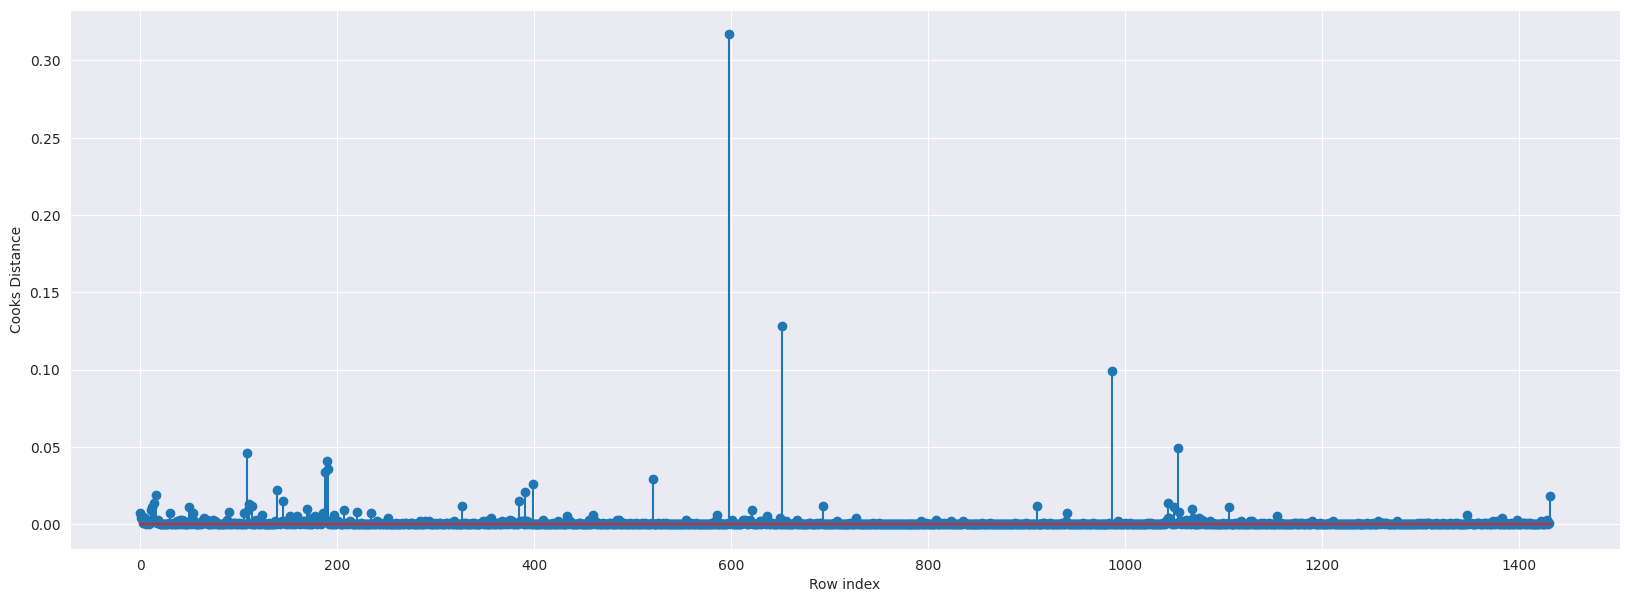

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota5)),np.round(c3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
# Since cook's distance is < 1, therefore we stop the model deletion
(np.argmax(c3),np.max(c3))

(598, 0.3168903540145446)

In [ ]:
#Since cook's distance = 0.31689 which is < 1, therefore we stop the model deletion and finalize the model

#Final Model

In [ ]:
# model3 is our final model with
# rsquare = 0.8839684606741538, aic=24453.23573612724)

In [ ]:
#Thus the model accuracy improved to 88.396 %

# Model Prediction

In [ ]:
# let the data for prediction is
pred_data=pd.DataFrame({'Age':6,"KM":40000,"HP":80,"Cylinder_vol":1800, "Doors":4,"Gears":5,"Q_tax": 350, "Weight":1304},index=[0])
pred_data

Age     KM  HP  Cylinder_vol  Doors  Gears  Q_tax  Weight
0    6  40000  80          1800      4      5    350    1304

In [ ]:
model3.predict(pred_data)

0    23593.052465
dtype: float64

In [ ]:
# prediction for original data with 88% accuracy
pred_price = model3.predict(toyota1)
pred_price

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1431     9114.821644
1432     8499.169594
1433     8644.902871
1434     8758.662855
1435    10638.570082
Length: 1436, dtype: float64